<a href="https://colab.research.google.com/github/shailendrasingh-cyber/-DATA-ANALYSIS-ON-UDEMY-COURSES/blob/main/Final_of_animal_intrusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-4495a274-e6f4-cd1f-13de-c1a0d6f129da)


In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d antoreepjana/animals-detection-images-dataset

Dataset URL: https://www.kaggle.com/datasets/antoreepjana/animals-detection-images-dataset
License(s): CC0-1.0
100% 8.91G/8.92G [01:21<00:00, 221MB/s]
100% 8.92G/8.92G [01:21<00:00, 118MB/s]


In [4]:
# Importing dependancies
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, make_confusion_matrix

In [7]:
! wget https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py

--2024-05-25 10:39:26--  https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10139 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.90K  --.-KB/s    in 0s      

2024-05-25 10:39:26 (99.7 MB/s) - ‘helper_functions.py’ saved [10139/10139]



In [9]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, make_confusion_matrix

In [10]:

# Unzipping the data
unzip_data("/content/animals-detection-images-dataset.zip")

In [11]:
! rm /content/animals-detection-images-dataset.zip

In [12]:
walk_through_dir("/content/train")

There are 80 directories and 0 images in '/content/train'.
There are 1 directories and 76 images in '/content/train/Hippopotamus'.
There are 0 directories and 76 images in '/content/train/Hippopotamus/Label'.
There are 1 directories and 233 images in '/content/train/Swan'.
There are 0 directories and 233 images in '/content/train/Swan/Label'.
There are 1 directories and 406 images in '/content/train/Owl'.
There are 0 directories and 406 images in '/content/train/Owl/Label'.
There are 1 directories and 327 images in '/content/train/Deer'.
There are 0 directories and 327 images in '/content/train/Deer/Label'.
There are 1 directories and 421 images in '/content/train/Parrot'.
There are 0 directories and 421 images in '/content/train/Parrot/Label'.
There are 1 directories and 494 images in '/content/train/Caterpillar'.
There are 0 directories and 494 images in '/content/train/Caterpillar/Label'.
There are 1 directories and 91 images in '/content/train/Panda'.
There are 0 directories and 91

In [13]:
walk_through_dir("/content/test")

There are 80 directories and 0 images in '/content/test'.
There are 1 directories and 22 images in '/content/test/Hippopotamus'.
There are 0 directories and 22 images in '/content/test/Hippopotamus/Label'.
There are 1 directories and 64 images in '/content/test/Swan'.
There are 0 directories and 64 images in '/content/test/Swan/Label'.
There are 1 directories and 70 images in '/content/test/Owl'.
There are 0 directories and 70 images in '/content/test/Owl/Label'.
There are 1 directories and 177 images in '/content/test/Deer'.
There are 0 directories and 177 images in '/content/test/Deer/Label'.
There are 1 directories and 180 images in '/content/test/Parrot'.
There are 0 directories and 180 images in '/content/test/Parrot/Label'.
There are 1 directories and 70 images in '/content/test/Caterpillar'.
There are 0 directories and 70 images in '/content/test/Caterpillar/Label'.
There are 1 directories and 19 images in '/content/test/Panda'.
There are 0 directories and 19 images in '/content

In [14]:
# Data Generator

 # setting up the train and test directory path

In [15]:
# setting up directories
train_dir = "/content/train"
test_dir = "/content/test"

In [16]:
train_data_gen = ImageDataGenerator()
test_data_gen = ImageDataGenerator()

In [17]:
IMG_SIZE = (224, 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 22566 files belonging to 80 classes.
Found 6505 files belonging to 80 classes.


In [18]:
len(train_data), len(test_data)

(706, 204)

In [19]:
class_names = train_data.class_names

In [20]:
train_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 80), dtype=tf.float32, name=None))>

In [21]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 80), dtype=tf.float32, name=None))>

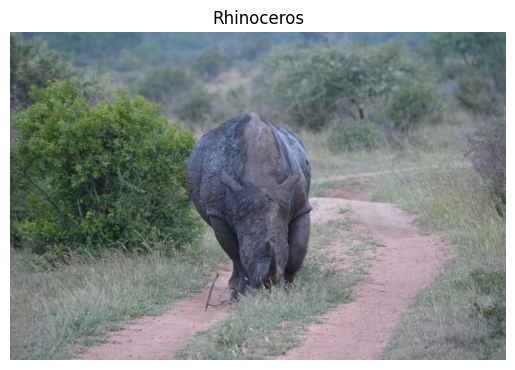

In [22]:
# Visulaizing the single random image
arr =[]
label = random.choice(class_names)
path = "/content/test"
basepath = os.path.join(path, label)
for fname in os.listdir(basepath):
    path = os.path.join(basepath, fname)
    if not os.path.isdir(path):
        # skip directories
        arr.append(path)
        continue

# Plotting the image
choice = random.choice(arr)
img = plt.imread(choice)
plt.axis(False)
plt.title(label)
plt.imshow(img/255.);

In [23]:
def show():
  arr =[]
  label = random.choice(class_names)
  path = "/content/train"
  basepath = os.path.join(path, label)
  for fname in os.listdir(basepath):
      path = os.path.join(basepath, fname)
      if not os.path.isdir(path):
          # skip directories
          arr.append(path)
          continue

  # Plotting the image
  img = random.choice(arr)

  return img, label


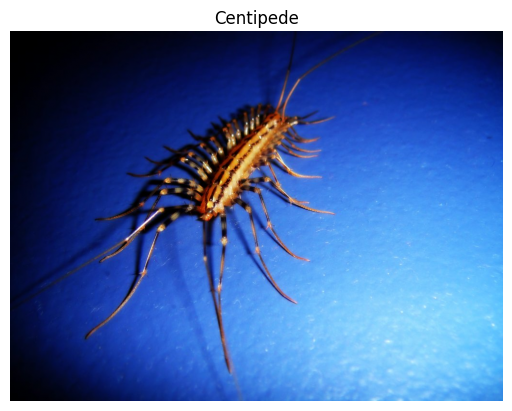

In [24]:
img, label = show()
img = plt.imread(img)
plt.axis(False)
plt.title(label)
plt.imshow(img/255.);

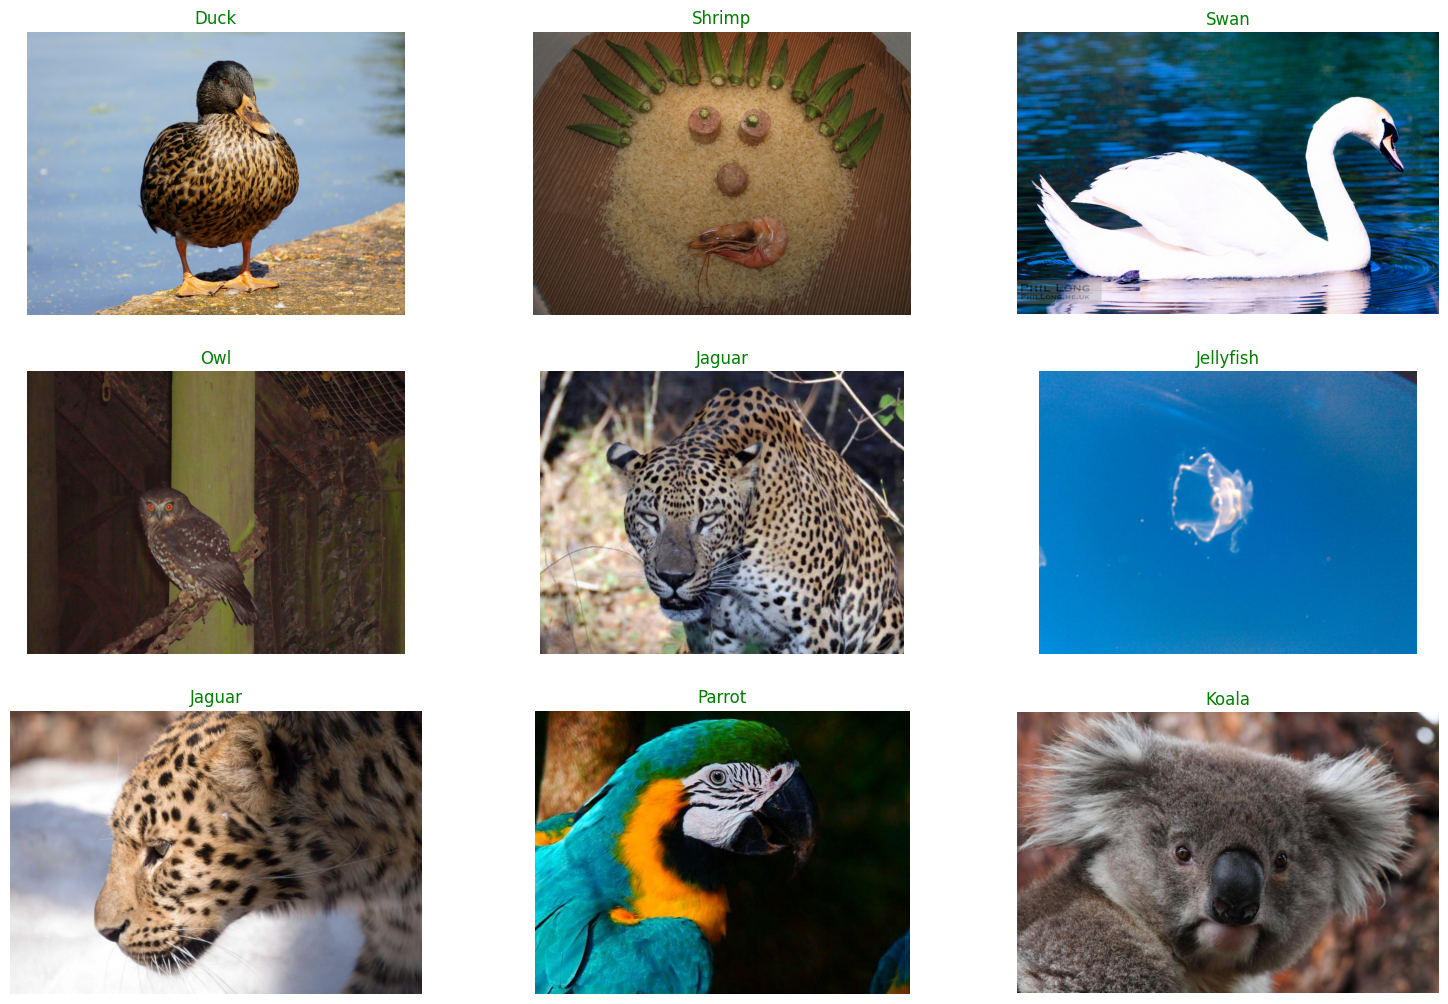

In [25]:
# viusualizing the multiple random images
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(18.5, 12.5)
for i in range(0, 3):
  for j in range(0, 3):
    img, label = show()
    img = plt.imread(img)
    axs[i, j].axis(False)
    axs[i, j].set_title(label, color="green")
    axs[i, j].imshow(img/255.)


In [26]:
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name ="data_augmentation")

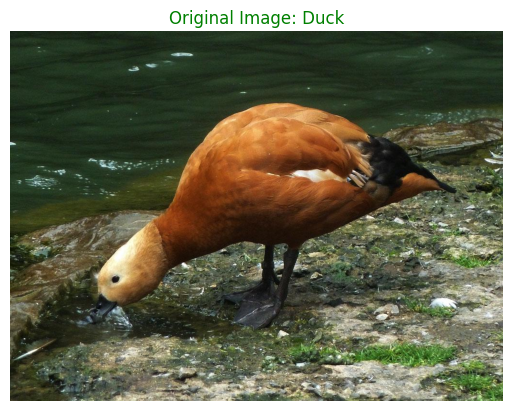

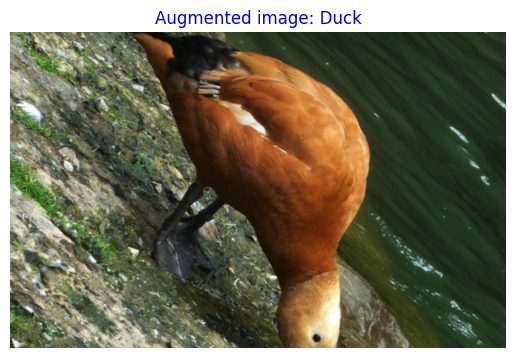

In [27]:
# visualizing the Augmented image

bpath = "/content/train"
c_class = random.choice(class_names)
fpath = os.path.join(bpath, c_class)
c_file = random.choice(os.listdir(fpath))
if c_file == "Label":
  c_file = random.choice(os.listdir(fpath))
path = os.path.join(fpath, c_file)
img = plt.imread(path)
plt.axis(False)
plt.imshow(img)
plt.title(f"Original Image: {c_class}", color="green");

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented image: {c_class}", color="blue")
plt.axis(False);

In [28]:
# models
# from here we will train a series of different models till i gbet a satisfying accuracy

# model 1
# Training our first model- EfficientNetB0

In [29]:
# Setting up base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compiling the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=0.25 * len(test_data))

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/5
706/706 [==============================] - 372s 510ms/step - loss: 1.2910 - accuracy: 0.6858 - val_loss: 0.8954 - val_accuracy: 0.7635
Epoch 2/5
706/706 [==============================] - 244s 343ms/step - loss: 0.7673 - accuracy: 0.7740 - val_loss: 0.7561 - val_accuracy: 0.7843
Epoch 3/5
706/706 [==============================] - 228s 319ms/step - loss: 0.6703 - accuracy: 0.7951 - val_loss: 0.7152 - val_accuracy: 0.7825
Epoch 4/5
706/706 [==============================] - 211s 295ms/step - loss: 0.6166 - accuracy: 0.8042 - val_loss: 0.7290 - val_accuracy: 0.7806
Epoch 5/5
706/706 [==============================] - 205s 287ms/step - loss: 0.5691 - accuracy: 0.8188 - val_loss: 0.7050 - val_accuracy: 0.7911


In [30]:
model_1.evaluate(test_data)

204/204 [==============================] - 47s 230ms/step - loss: 0.6197 - accuracy: 0.8154


[0.6196708083152771, 0.8153727650642395]

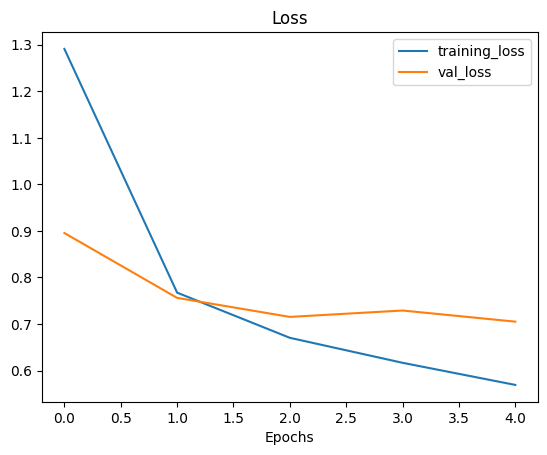

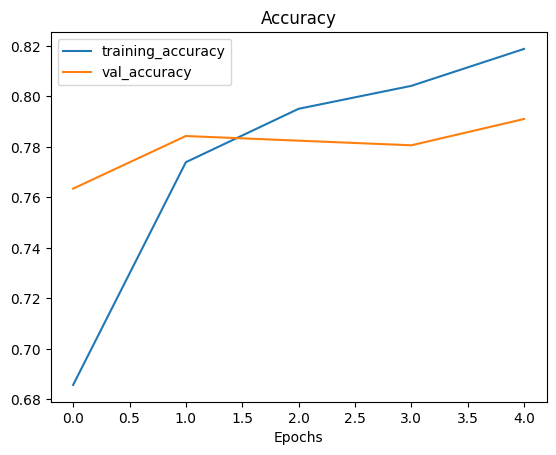

In [32]:
plot_loss_curves(history_1)

In [33]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 Global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 80)                102480

In [34]:
#  fine tuning the model 1

# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [35]:
# Recompile model with lower learning rate
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])

In [36]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10

history_1_fine_tune_1 = model_1.fit(train_data,
                                    epochs=fine_tune_epochs,
                                    validation_data=test_data,
                                    validation_steps=0.25 * len(test_data),
                                    initial_epoch=history_1.epoch[-1])

Epoch 5/10
706/706 [==============================] - 207s 276ms/step - loss: 0.5203 - accuracy: 0.8299 - val_loss: 0.6655 - val_accuracy: 0.7978
Epoch 6/10
706/706 [==============================] - 188s 264ms/step - loss: 0.4715 - accuracy: 0.8423 - val_loss: 0.6936 - val_accuracy: 0.7923
Epoch 7/10
706/706 [==============================] - 188s 264ms/step - loss: 0.4343 - accuracy: 0.8516 - val_loss: 0.6928 - val_accuracy: 0.7972
Epoch 8/10
706/706 [==============================] - 185s 260ms/step - loss: 0.4023 - accuracy: 0.8604 - val_loss: 0.6881 - val_accuracy: 0.7996
Epoch 9/10
706/706 [==============================] - 184s 258ms/step - loss: 0.3813 - accuracy: 0.8667 - val_loss: 0.7110 - val_accuracy: 0.7947
Epoch 10/10
706/706 [==============================] - 185s 260ms/step - loss: 0.3661 - accuracy: 0.8709 - val_loss: 0.6914 - val_accuracy: 0.8002


In [37]:
model_1.evaluate(test_data)

204/204 [==============================] - 47s 229ms/step - loss: 0.6104 - accuracy: 0.8181


[0.6103883981704712, 0.818139910697937]

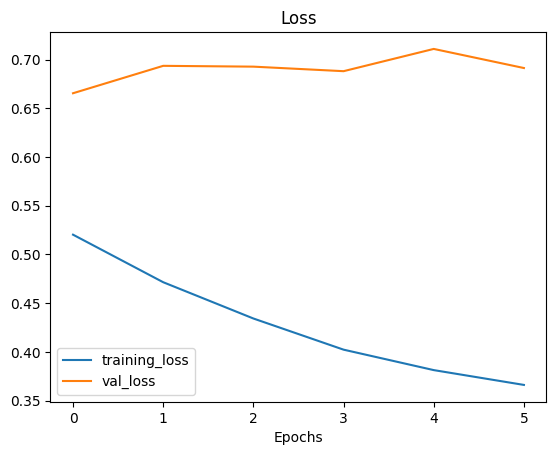

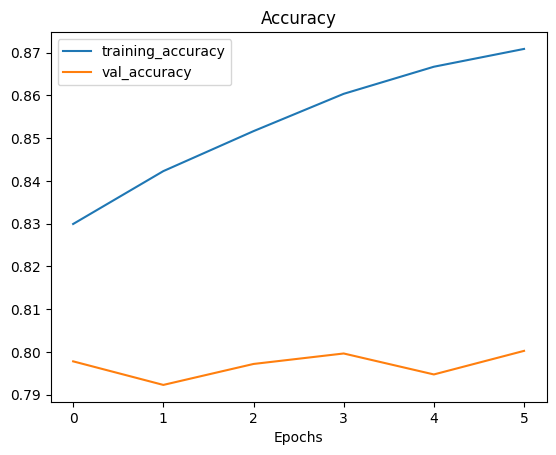

In [38]:
plot_loss_curves(history_1_fine_tune_1)

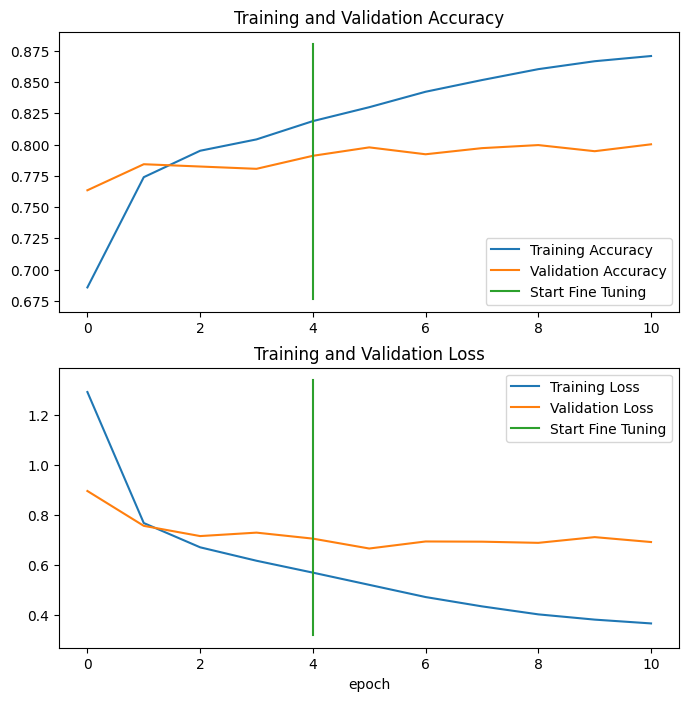

In [39]:
compare_historys(history_1, history_1_fine_tune_1, initial_epochs=5)

In [40]:
model_1.save("/content/drive/MyDrive/Baba")

In [41]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Baba")

In [42]:
# Insight of the model

pred_probs = model.predict(test_data)

204/204 [==============================] - 49s 230ms/step


In [43]:
pred_probs[0]

array([9.67674553e-01, 1.08470991e-02, 2.21205642e-04, 8.65464790e-06,
       1.04926476e-05, 5.56413511e-07, 4.54350316e-04, 4.81872084e-05,
       3.58638972e-05, 5.87155682e-06, 9.47291483e-05, 6.01075089e-06,
       1.08877646e-06, 1.34649135e-05, 1.40877048e-04, 1.89444661e-04,
       1.35317197e-04, 4.60257033e-05, 9.39265919e-06, 6.01661523e-05,
       9.32370313e-05, 5.98376477e-03, 5.53139898e-06, 2.24569594e-04,
       7.20440730e-05, 7.73123247e-06, 3.38466256e-04, 3.76694770e-05,
       7.00718010e-05, 7.39038569e-07, 3.70813286e-05, 4.65250241e-06,
       2.61392088e-05, 1.42803125e-04, 4.10432477e-07, 1.86162215e-05,
       7.11492103e-05, 4.91752826e-06, 4.94021078e-05, 7.04388320e-03,
       9.45577412e-05, 3.27641610e-05, 2.01296731e-04, 1.55609427e-03,
       3.63442450e-05, 3.62162922e-07, 1.13397677e-04, 3.75848941e-07,
       2.43576396e-05, 1.53237174e-03, 2.22404604e-04, 3.30921443e-06,
       3.21219733e-04, 1.32974048e-04, 7.30809625e-05, 2.35209359e-06,
      

In [44]:
pred_probs[0].argmax()

0

In [45]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([ 0,  0, 54, 54,  0, 54, 61, 54, 54, 54])

In [47]:
len(pred_classes), len(pred_probs)

(6505, 6505)

In [48]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [49]:
len(y_labels)

6505

In [50]:
# Plotting a confusion matrix
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [51]:
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61        39
           1       0.79      0.85      0.81        39
           2       0.45      0.55      0.50        73
           3       0.92      0.95      0.94       170
           4       0.82      0.85      0.84        27
           5       0.34      0.94      0.50        16
           6       0.74      0.69      0.71        70
           7       0.80      0.49      0.60       171
           8       0.72      0.84      0.77        43
           9       0.44      0.43      0.43        35
          10       0.86      0.93      0.90       137
          11       0.74      0.97      0.84       114
          12       0.96      0.96      0.96        76
          13       0.92      0.81      0.86       177
          14       0.72      0.69      0.71        88
          15       0.92      0.94      0.93       178
          16       0.78      0.94      0.85        33
          17       0.91    

In [52]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.6216216216216216,
  'recall': 0.5897435897435898,
  'f1-score': 0.6052631578947368,
  'support': 39},
 '1': {'precision': 0.7857142857142857,
  'recall': 0.8461538461538461,
  'f1-score': 0.8148148148148148,
  'support': 39},
 '2': {'precision': 0.45454545454545453,
  'recall': 0.547945205479452,
  'f1-score': 0.49689440993788814,
  'support': 73},
 '3': {'precision': 0.9204545454545454,
  'recall': 0.9529411764705882,
  'f1-score': 0.9364161849710982,
  'support': 170},
 '4': {'precision': 0.8214285714285714,
  'recall': 0.8518518518518519,
  'f1-score': 0.8363636363636364,
  'support': 27},
 '5': {'precision': 0.3409090909090909,
  'recall': 0.9375,
  'f1-score': 0.5,
  'support': 16},
 '6': {'precision': 0.7384615384615385,
  'recall': 0.6857142857142857,
  'f1-score': 0.7111111111111111,
  'support': 70},
 '7': {'precision': 0.7980769230769231,
  'recall': 0.4853801169590643,
  'f1-score': 0.6036363636363636,
  'support': 171},
 '8': {'precision': 0.72,
  'rec

In [53]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'Bear': 0.6052631578947368,
 'Brown bear': 0.8148148148148148,
 'Bull': 0.49689440993788814,
 'Butterfly': 0.9364161849710982,
 'Camel': 0.8363636363636364,
 'Canary': 0.5,
 'Caterpillar': 0.7111111111111111,
 'Cattle': 0.6036363636363636,
 'Centipede': 0.7741935483870969,
 'Cheetah': 0.43478260869565216,
 'Chicken': 0.8982456140350877,
 'Crab': 0.8377358490566038,
 'Crocodile': 0.9605263157894737,
 'Deer': 0.8588588588588588,
 'Duck': 0.7052023121387283,
 'Eagle': 0.9307479224376731,
 'Elephant': 0.8493150684931509,
 'Fish': 0.8317180616740087,
 'Fox': 0.9640287769784173,
 'Frog': 0.9605263157894737,
 'Giraffe': 0.8,
 'Goat': 0.6984126984126984,
 'Goldfish': 0.5428571428571428,
 'Goose': 0.23728813559322037,
 'Hamster': 0.35643564356435636,
 'Harbor seal': 0.37735849056603776,
 'Hedgehog': 0.9696969696969697,
 'Hippopotamus': 0.7916666666666666,
 'Horse': 0.8129032258064516,
 'Jaguar': 0.3174603174603174,
 'Jellyfish': 0.9326424870466321,
 'Kangaroo': 0.8863636363636364,
 'Koala': 0.

In [54]:
# Turn f1-scores into dataframe for visualization
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

class_name  f1-score
43    Ostrich  0.980132
26   Hedgehog  0.969697
63      Snail  0.969163
66     Spider  0.968215
56   Scorpion  0.965517
..        ...       ...
29     Jaguar  0.317460
59   Seahorse  0.307692
23      Goose  0.237288
67      Squid  0.125000
71       Tick  0.000000

[80 rows x 2 columns]

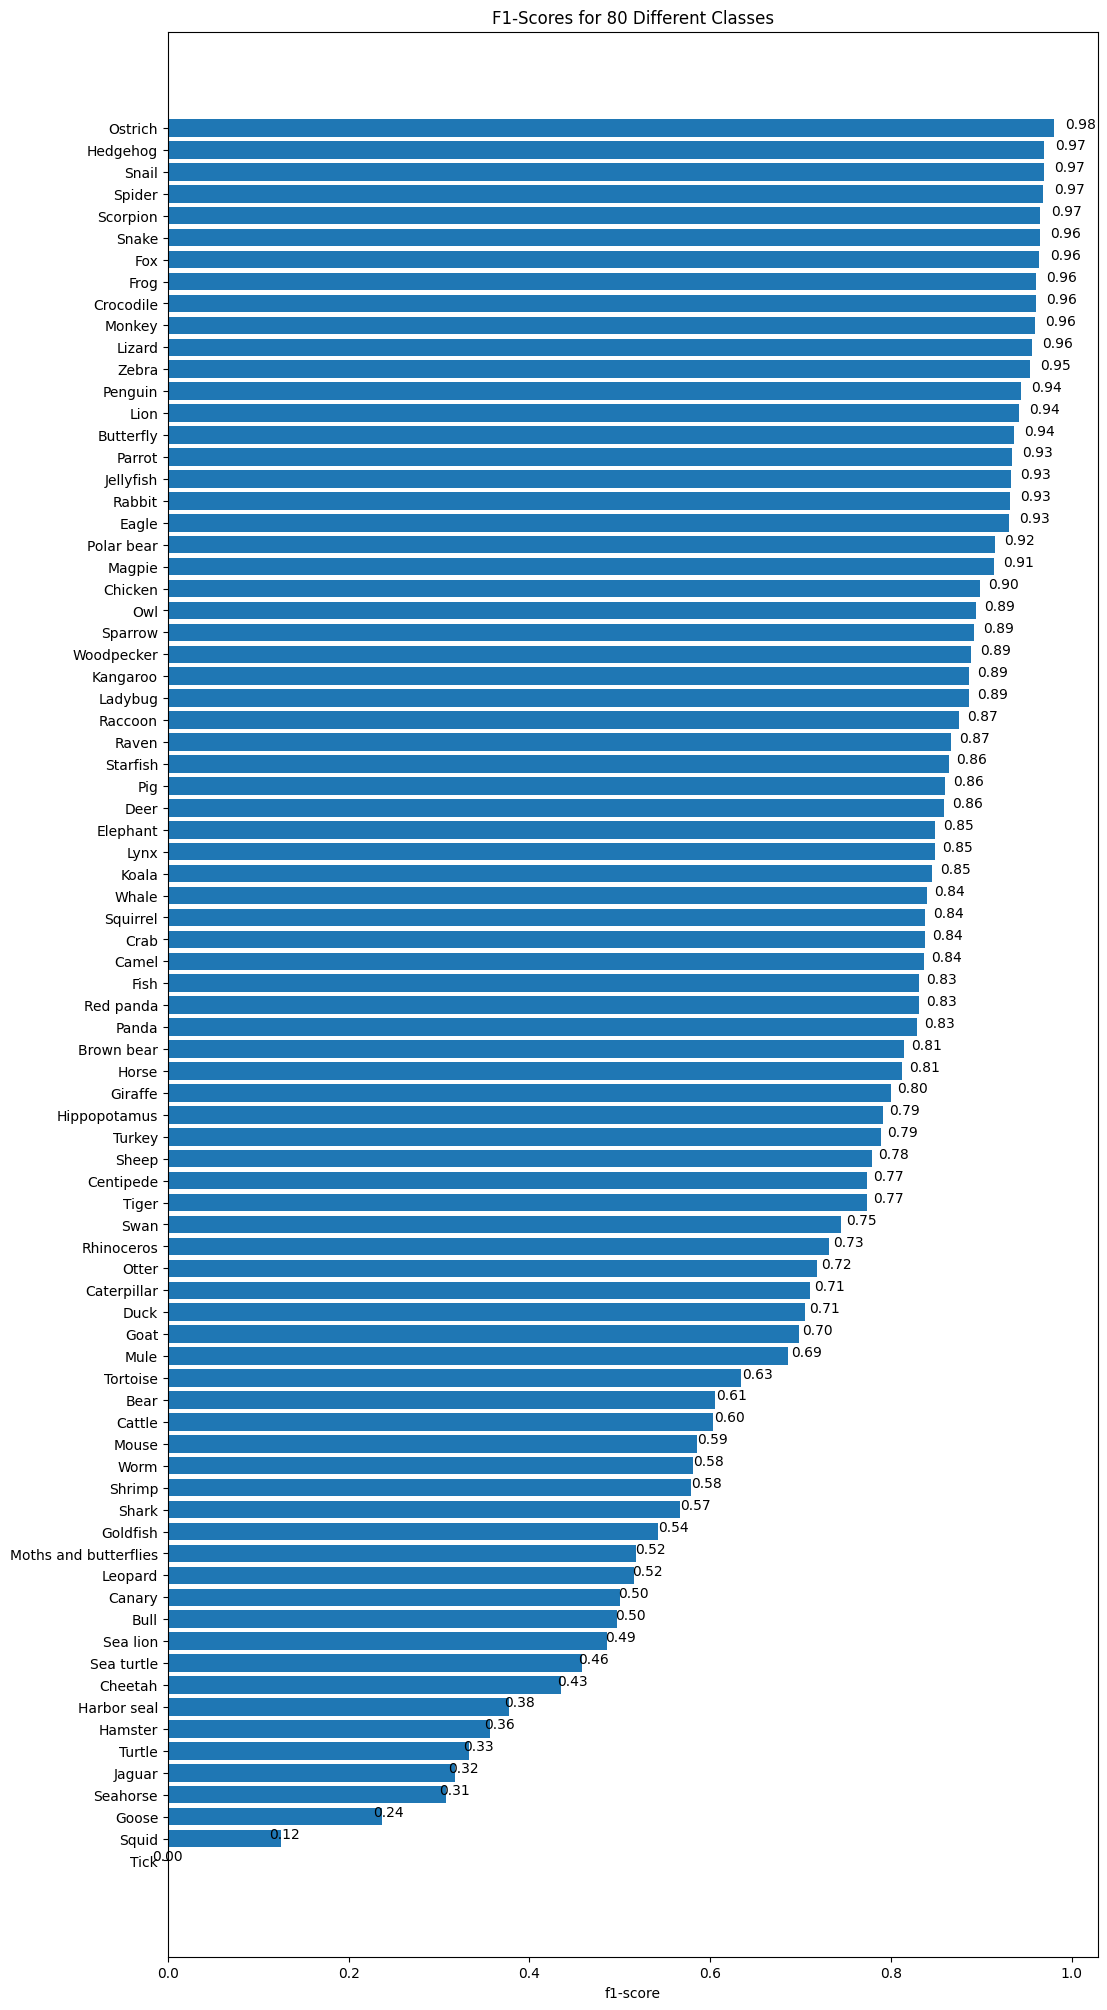

In [55]:
fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 80 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects):
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [56]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 26ms/step


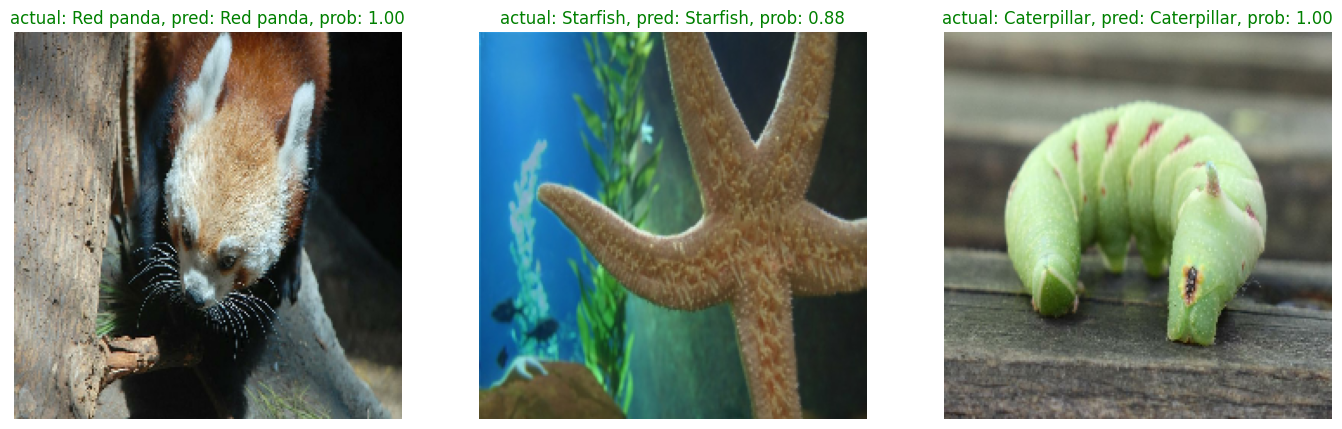

In [57]:
plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + "/" + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [58]:
arr=[]
for el in class_names:
  path = "/content/test"
  basepath = os.path.join(path, el)
  for fname in os.listdir(basepath):
      path = os.path.join(basepath, fname)
      if not os.path.isdir(path):
          # skip directories
          arr.append(path)
          continue

1/1 [==============================] - 0s 41ms/step


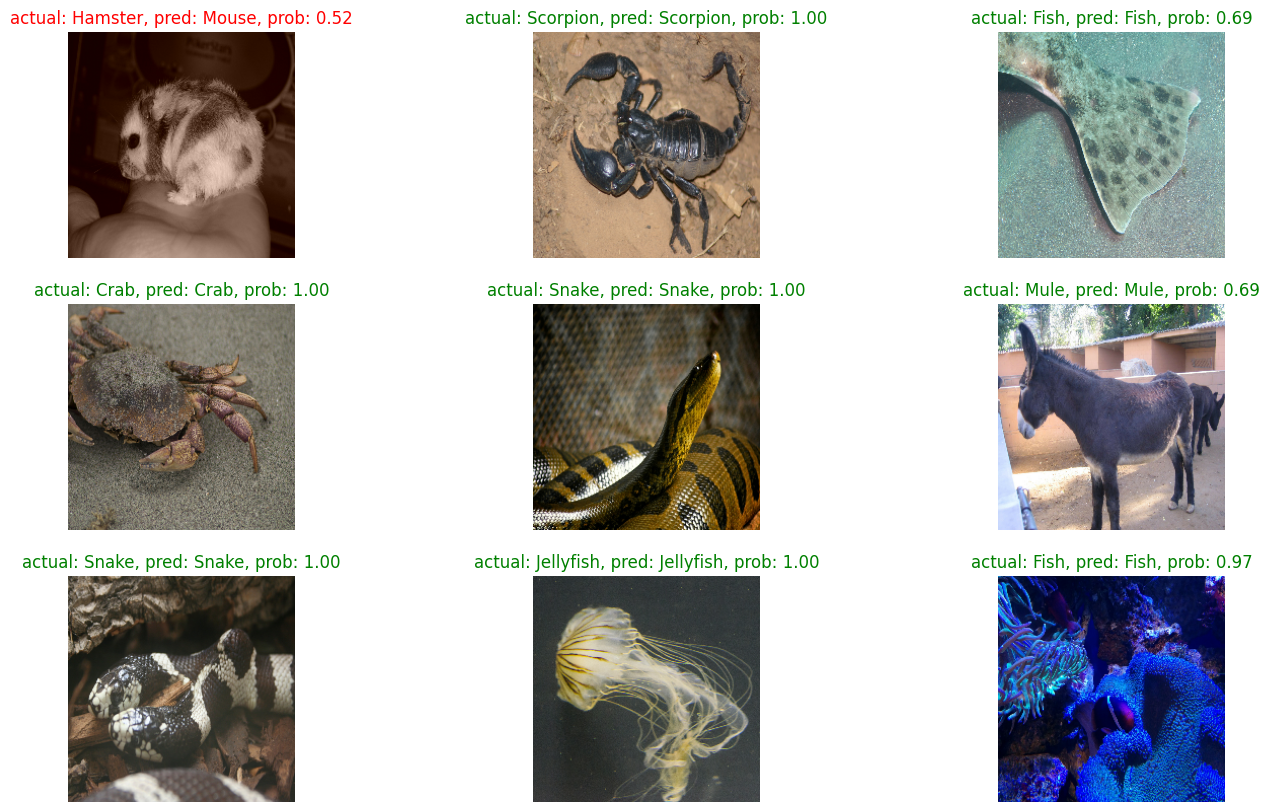

In [59]:
plt.figure(figsize=(17, 10))
for i in range(9):
  # Choose a random image from a random class
  filepath = random.choice(arr)
  class_name = filepath.split("/")[3]

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(3, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [60]:
# Get the filenames of all of our test data
filepaths = []
for filepath in test_data.list_files("/content/test/*/*.jpg",
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'/content/test/Bear/0df78ee76bafd3a9.jpg',
 b'/content/test/Bear/0f899aca6d0fb6e1.jpg',
 b'/content/test/Bear/1cca48c57103a42c.jpg',
 b'/content/test/Bear/1fa809bf6cf5ea36.jpg',
 b'/content/test/Bear/200046eca85cd992.jpg',
 b'/content/test/Bear/23bf858cb1d0ef63.jpg',
 b'/content/test/Bear/23d1d39d81d411da.jpg',
 b'/content/test/Bear/322e901e952ea866.jpg',
 b'/content/test/Bear/3d77555f2ede0b38.jpg',
 b'/content/test/Bear/3df2b6a098712fee.jpg']

In [61]:
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})
pred_df.head()

img_path  y_true  y_pred  pred_conf  \
0  b'/content/test/Bear/0df78ee76bafd3a9.jpg'       0       0   0.967675   
1  b'/content/test/Bear/0f899aca6d0fb6e1.jpg'       0       0   0.937829   
2  b'/content/test/Bear/1cca48c57103a42c.jpg'       0      54   0.998521   
3  b'/content/test/Bear/1fa809bf6cf5ea36.jpg'       0      54   0.999644   
4  b'/content/test/Bear/200046eca85cd992.jpg'       0       0   0.754518   

  y_true_classname y_pred_classname  
0             Bear             Bear  
1             Bear             Bear  
2             Bear        Red panda  
3             Bear        Red panda  
4             Bear             Bear

In [62]:
# check for pred
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  y_true  y_pred  pred_conf  \
0  b'/content/test/Bear/0df78ee76bafd3a9.jpg'       0       0   0.967675   
1  b'/content/test/Bear/0f899aca6d0fb6e1.jpg'       0       0   0.937829   
2  b'/content/test/Bear/1cca48c57103a42c.jpg'       0      54   0.998521   
3  b'/content/test/Bear/1fa809bf6cf5ea36.jpg'       0      54   0.999644   
4  b'/content/test/Bear/200046eca85cd992.jpg'       0       0   0.754518   

  y_true_classname y_pred_classname  pred_correct  
0             Bear             Bear          True  
1             Bear             Bear          True  
2             Bear        Red panda         False  
3             Bear        Red panda         False  
4             Bear             Bear          True

In [63]:
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

img_path  y_true  y_pred  \
1906     b'/content/test/Fish/ad6768f15203ed1a.jpg'      17      60   
37       b'/content/test/Bear/f0cd1050b09dd625.jpg'       0      54   
9        b'/content/test/Bear/3df2b6a098712fee.jpg'       0      54   
4715  b'/content/test/Raccoon/3df2b6a098712fee.jpg'      52      54   
11       b'/content/test/Bear/50100f0b149c5668.jpg'       0      54   
5702  b'/content/test/Sparrow/4ecd53011e47f224.jpg'      65      77   
2264  b'/content/test/Giraffe/8e989aae24d45230.jpg'      20      79   
1889     b'/content/test/Fish/a704ec4be2217b23.jpg'      17      60   
8        b'/content/test/Bear/3d77555f2ede0b38.jpg'       0      54   
3        b'/content/test/Bear/1fa809bf6cf5ea36.jpg'       0      54   
5665  b'/content/test/Sparrow/14fce647401ac7c6.jpg'      65       5   
7        b'/content/test/Bear/322e901e952ea866.jpg'       0      54   
1646     b'/content/test/Fish/43c0751269a742b9.jpg'      17      60   
20       b'/content/test/Bear/9e411cef88b11bb7.jpg'       0      54   
1617     b'/content/test/Fish/39eb679fc9ba8a0f.jpg'      17      60   
1807     b'/content/test/Fish/852db00f30921d41.jpg'      17      60   
1546     b'/content/test/Fish/1d59db2495553468.jpg'      17      60   
2014     b'/content/test/Fish/db3798bf28e1a847.jpg'      17      60   
12       b'/content/test/Bear/5e4722478ab9c699.jpg'       0      54   
5687  b'/content/test/Sparrow/39091d40f0036817.jpg'      65       5   

      pred_conf y_true_classname y_pred_classname  pred_correct  
1906   0.999984             Fish            Shark         False  
37     0.999976             Bear        Red panda         False  
9      0.999926             Bear        Red panda         False  
4715   0.999926          Raccoon        Red panda         False  
11     0.999896             Bear        Red panda         False  
5702   0.999888          Sparrow       Woodpecker         False  
2264   0.999846          Giraffe            Zebra         False  
1889   0.999826             Fish            Shark         False  
8      0.999819             Bear        Red panda         False  
3      0.999644             Bear        Red panda         False  
5665   0.999622          Sparrow           Canary         False  
7      0.999583             Bear        Red panda         False  
1646   0.999556             Fish            Shark         False  
20     0.999537             Bear        Red panda         False  
1617   0.999527             Fish            Shark         False  
1807   0.999492             Fish            Shark         False  
1546   0.999373             Fish            Shark         False  
2014   0.999233             Fish            Shark         False  
12     0.999128             Bear        Red panda         False  
5687   0.999083          Sparrow           Canary         False

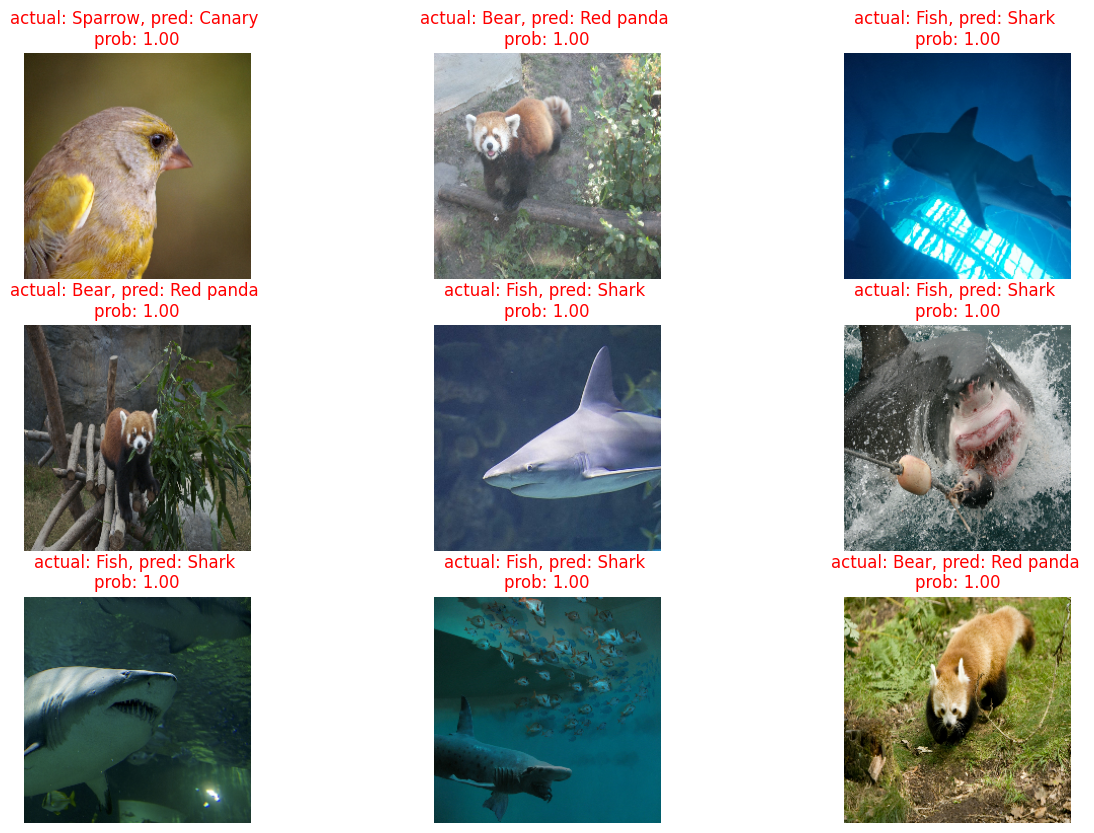

In [64]:
# Visualize some of the most wrong examples
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}", color="red")
  plt.axis(False)